### Projeto de Análise de Dados de Eficiência de uma Turbina Eólica na Turquia

Fonte do dataset: https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Observações e informações que o dataset apresenta


# Date time: Normalmente os sistemas energia eólica apresentam resultados considerando intervalos de 10 em 10 minutos
# LV ActivePower (kW): Potencia ativa da turbina naquele dia e hora
# Wind speed: A velocidade do vento na altura do cubo da turbina (a velocidade do vento que a turbina usa para geração de eletricidade)
# Curva teórica: Os valores teóricos de potência que a turbina gera com a velocidade do vento que é dada pelo fabricante da turbina. Se tudo acontecesse nas mais perfeitas condições, essa é a curva que a turbina eólica deveria seguir (como se fosse o gabarito dela). Resumindo, essa curva mostra como as coisas deveriam funcionar nas mais perfeitas condições de "temperatura e pressão atmosférica".
# Wind direction: A direção do vento na altura do cubo da turbina (as turbinas eólicas giram para esta direção automaticamente).

In [2]:
# Conhecendo o dataset

turbina = pd.read_csv('Dataset_WindTurbine.csv')
display(turbina)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [3]:
# Renomeando as colunas e entendendo os tipos de dados:
turbina.columns = ['Data/hora', 'Potencia_Momento(kW)', 'WindSpeed(m/s)', 'Curva_Teorica(kW)','Wind_Direction(°)']

display(turbina.dtypes)
print('A quantidade de linhas do dataset é de: ',turbina.shape[0])
print('A quantidade de colunas do dataset é de: ',turbina.shape[1])


Data/hora                object
Potencia_Momento(kW)    float64
WindSpeed(m/s)          float64
Curva_Teorica(kW)       float64
Wind_Direction(°)       float64
dtype: object

A quantidade de linhas do dataset é de:  50530
A quantidade de colunas do dataset é de:  5


In [4]:
# Vamos excluir a coluna turbina, pois não usaremos ela nesse exercício
del turbina['Wind_Direction(°)']

# Vamos converter o tipo de dado da coluna Data/Hora para datetime. Estamos dizendo para o pandas pegar a coluna e transformar ela em date time e depois sobrescrever na própria coluna Data/hora
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'])
display(turbina)

,Data/hora,Potencia_Momento(kW),WindSpeed(m/s),Curva_Teorica(kW)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


Visualizando os dados através do gráfico de dispersão da biblioteca seaborn

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='Potencia_Momento(kW)'>

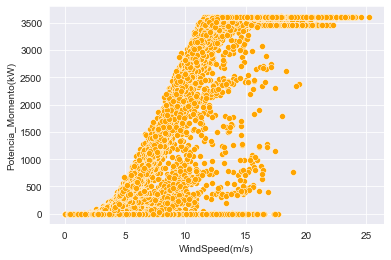

In [5]:
# vamos importar o rcParams para definirmos o tamanho do visual
from matplotlib import rcParams

rcParams["figure.figsize"] = 12,6

# Vamos informar que os dados são os dados da tabela turbina, o eixo x são os dados do WindSpeed e o eixo y são os dados da potência daquele momento
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='Potencia_Momento(kW)', color= 'orange')

# Podemos observar que temos no eixo x ele mostra a velocidade de metros por segundo x potencia gerada. Observa-se que cada ponto, para cada velocidade do vento, quanto de potencia a turbina tinha naquele momento.
# mesmo com vento, podemos observar que em alguns momentos a turbina não apresentou potência, o que poderia representar uma eventual manutenção, falha etc.
# Podemos observar também que os pontos apresentam um formato de curva similar a curva teórica (que é a curva do fabricante), obviamente vai variar conforme fabricante, potência e vento, mas a forma mais ou menos é essa.
# Ela chega num momento que mesmo tendo muito vento, como ela já chegou no limite dela ela não gera mais potência, representando o desenho da curva teórica.

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='Curva_Teorica(kW)'>

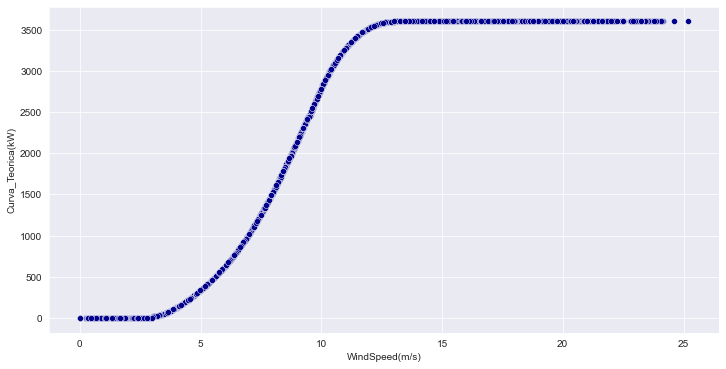

In [6]:
# Vamos visualizar a curva teórica
rcParams["figure.figsize"] = 12,6
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='Curva_Teorica(kW)', color = 'darkblue')

# Podemos observar pelo gráfico da curva teórica que para 10 metros por segundo, a turbina deveria ta gerando algo próximo a 2.500 de potência.
# Ou seja, se tudo fosse perfeito, a turbina deveria está apresentando esse formato de curva

Vamos definir um limite aceitável. Vamos assumir que 10% para cima ou 10% para baixo, vamos aceitar como limítes aceitáveis

In [7]:
#vel_vento = turbina['WindSpeed(m/s)'].tolist()

# vamos transformar os valores da serie em uma lista, depois voltamos ele para dentro do pandas
potencia_realizada= turbina['Potencia_Momento(kW)'].tolist()
potencia_teorica = turbina['Curva_Teorica(kW)'].tolist()

pot_max=[] # Criaremos uma lista de potência maxima, com o valor da potência teorica + 10%
pot_min=[] # Criaremos uma lista de potência maxima, com o valor da potência teorica - 10%
dentro_limite = []
limite = 0.10 # Limite aceitável

# para cada potência que temos dentro de potência teórica, vamos adicionar potência + e - 10% em listas separadas
for potencia in potencia_teorica:
    pot_max.append(potencia*(1+limite))
    pot_min.append(potencia*(1-limite))

#
for i, potencia in enumerate(potencia_realizada): # o i, significa para cada índice que acontecer
    if potencia>=pot_min[i] and potencia<=pot_max[i]: # ou seja, estamos comparando o valor da potencia em potencia realizada com os intervalos que criamos de limite inferior e superior
        dentro_limite.append('Verdadeiro') # se estiver dentro, ele adiciona verdadeiro
    elif potencia == 0: # se o valor da potencia for zero
        dentro_limite.append('Zero')
    else: # se o valor da potencia não estiver no intervalo (que respeita o limite superior e inferior), no caso, ficaria abaixo do inferior, ele coloca falso
        dentro_limite.append('Falso')

display(dentro_limite[:10]) # vamos ver como está a lista, pegando apenas os primeiros 10 dados
representatividade_dentro_limite = round(dentro_limite.count('Verdadeiro')/len(dentro_limite),4) # Vamos contar quantos sao verdadeiros (dentro do limite) em toda a lista limite criada
print("Os valores dentro do limite representam: ",representatividade_dentro_limite * 100, "%" )


['Verdadeiro',
 'Falso',
 'Falso',
 'Falso',
 'Falso',
 'Falso',
 'Falso',
 'Verdadeiro',
 'Verdadeiro',
 'Verdadeiro']

Os valores dentro do limite representam:  50.55 %


In [8]:
# Vamos checar se o for percorreu todo mundo e criou listas de mesmo tamanho para pot_max, pot_min e a potencia teorica

print(len(pot_min), len(pot_max), len(potencia_teorica))


50530 50530 50530


In [9]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/hora,Potencia_Momento(kW),WindSpeed(m/s),Curva_Teorica(kW),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Verdadeiro
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Falso
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Falso
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Falso
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Falso
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Falso
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Falso
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Falso
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Verdadeiro


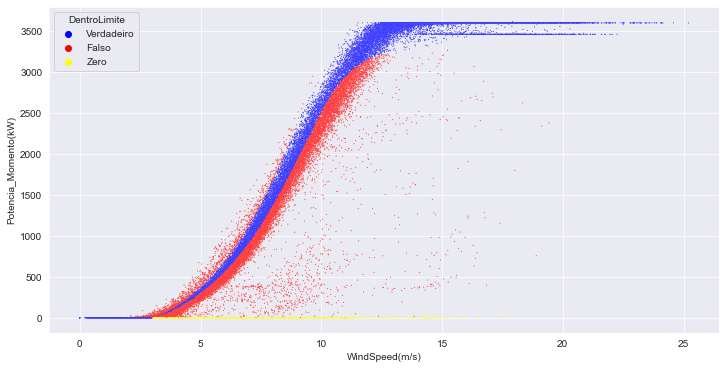

In [10]:
cores = {'Verdadeiro':'blue','Falso':'red','Zero':'yellow'}
graf = sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='Potencia_Momento(kW)',hue='DentroLimite', s=1, palette=cores) # colocamos o novo argumento hue, que será a nova coluna que criamos. Usamos o s = para definirmos o tamanho das bolinhas